## Assignment 9: Document Classification

**GROUP: Forhad Akbar, Adam Douglas, and Soumya Ghosh**

In [1]:
import nltk
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import sklearn.metrics as sm


## Data 

Source: http://archive.ics.uci.edu/ml/datasets/Spambase

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

For background on spam:

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

(a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
(b) Determine whether a given email is spam or not.
(c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.

## Data preparation and load

We downloaded spambase.data and spambase.names from the source website. spambase.names file contains the column names and spambase.data contains actual data. We created spambase.csv following direction from the source website. We will load the data in following code chunk.

In [2]:
spambase = pd.read_csv("spambase.csv")

## Data exploration   

In [3]:
# Looking at first few rows
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Spam / non-spam count     

The last column spamclass contain whether a email is spam or not. 

1 = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [6]:
spam_count = len(spambase[spambase.spamclass == 1])
notspam_count = len(spambase[spambase.spamclass == 0])

print("Spam count: %d" %spam_count)
print("Non spam count: %d" %notspam_count)

Spam count: 1813
Non spam count: 2788


#### Check for nulls 

In [7]:
spambase[spambase.isnull().any(axis = 1)]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass


## Data Preparation

Let's split the data into train and test, distributing 70% in train.

In [8]:
spambase_rows = len(spambase)
train_rows = int(spambase_rows * 0.7)
val_rows = int(spambase_rows * 0.15)
test_rows = spambase_rows - train_rows - val_rows

In [9]:
print("Training rows (70 prc of total): %d" %train_rows)
print("Validation rows (15 prc of total): %d" %val_rows)
print("Testing rows (15 prc of total): %d" %test_rows)
print("Total: %d" %(train_rows + val_rows + test_rows))

Training rows (70 prc of total): 3220
Validation rows (15 prc of total): 690
Testing rows (15 prc of total): 691
Total: 4601


In [10]:
train_set, test_set = train_test_split(spambase, test_size = test_rows, random_state = 8)
train_set, val_set = train_test_split(train_set, test_size = val_rows, random_state = 88)

In [11]:
print("Training set: %d" %len(train_set))
print("Validation set: %d" %len(val_set))
print("Testing set: %d" %len(test_set))
print("Total: %d" %(len(train_set) + len(val_set) + len(test_set)))

Training set: 3220
Validation set: 690
Testing set: 691
Total: 4601


## Confusion Matrix

We will compute Confusion Matrix using following function, which will give us True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN), from which the "Accuracy" of an algorithm can be determined.    

In [12]:
def func_confusion_matrix(y_true, y_pred):
    cm = sm.confusion_matrix(y_true, y_pred, labels = [1, 0])
    print("TP: %d" %cm[0,0])
    print("FP: %d" %cm[1,0])
    print("TN: %d" %cm[1,1])
    print("FN: %d" %cm[0,1])
    print(sm.classification_report(y_true, y_pred, labels = [1,0], target_names = ["Spam", "Not spam"]))  
    return cm

## Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
Source: https://scikit-learn.org/stable/modules/tree.html

In [13]:
tree = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 88)

### Training Set

In [14]:
train_class = train_set['spamclass']
train_vars = train_set.drop(labels = 'spamclass', axis = 1)

tree_fit = tree.fit(train_vars, train_class)

tree_train = tree_fit.predict(train_vars)
cm = func_confusion_matrix(train_class, tree_train)

TP: 1260
FP: 0
TN: 1958
FN: 2
              precision    recall  f1-score   support

        Spam       1.00      1.00      1.00      1262
    Not spam       1.00      1.00      1.00      1958

    accuracy                           1.00      3220
   macro avg       1.00      1.00      1.00      3220
weighted avg       1.00      1.00      1.00      3220



### Validation set

In [15]:
validate_class = val_set['spamclass']
validate_vars = val_set.drop(labels='spamclass', axis = 1)

tree_validate = tree_fit.predict(validate_vars)    
cm = func_confusion_matrix(validate_class, tree_validate)

TP: 252
FP: 17
TN: 401
FN: 20
              precision    recall  f1-score   support

        Spam       0.94      0.93      0.93       272
    Not spam       0.95      0.96      0.96       418

    accuracy                           0.95       690
   macro avg       0.94      0.94      0.94       690
weighted avg       0.95      0.95      0.95       690



### Test set

In [16]:
test_class = test_set['spamclass']
test_vars = test_set.drop(labels='spamclass', axis = 1)

tree_test = tree_fit.predict(test_vars)            
cm = func_confusion_matrix(test_class, tree_test)

TP: 251
FP: 29
TN: 383
FN: 28
              precision    recall  f1-score   support

        Spam       0.90      0.90      0.90       279
    Not spam       0.93      0.93      0.93       412

    accuracy                           0.92       691
   macro avg       0.91      0.91      0.91       691
weighted avg       0.92      0.92      0.92       691



**Precision**
Precision attempts to answer the following question:
What proportion of positive identifications was actually correct?

**Recall**
Recall attempts to answer the following question:
What proportion of actual positives was identified correctly?

### Variable importance

In [17]:
def func_arrange_feature_by_importance(fit, vars):
    df = {'variable': pd.Series(vars.columns.values), 'imp': pd.Series(fit.feature_importances_)}
    return pd.DataFrame(df, columns=['variable','imp']).sort_values(['imp'], ascending=0).head(10)

func_arrange_feature_by_importance(tree_fit, test_vars)

,variable,imp
51,char_freq_!,0.296289
52,char_freq_$,0.130370
6,word_freq_remove,0.125547
54,capital_run_length_average,0.056054
55,capital_run_length_longest,0.035736
26,word_freq_george,0.033155
56,capital_run_length_total,0.026242
24,word_freq_hp,0.025670
4,word_freq_our,0.025391
18,word_freq_you,0.024984


## Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [18]:
forest = ensemble.RandomForestClassifier(criterion = "entropy", random_state = 88)

### Training set

In [19]:
forest_fit = forest.fit(train_vars, train_class)

forest_train = forest_fit.predict(train_vars)
cm = func_confusion_matrix(train_class, forest_train)

TP: 1261
FP: 1
TN: 1957
FN: 1
              precision    recall  f1-score   support

        Spam       1.00      1.00      1.00      1262
    Not spam       1.00      1.00      1.00      1958

    accuracy                           1.00      3220
   macro avg       1.00      1.00      1.00      3220
weighted avg       1.00      1.00      1.00      3220



### Test set

In [20]:
forest_test = forest_fit.predict(test_vars)
cm = func_confusion_matrix(test_class, forest_test)

TP: 258
FP: 10
TN: 402
FN: 21
              precision    recall  f1-score   support

        Spam       0.96      0.92      0.94       279
    Not spam       0.95      0.98      0.96       412

    accuracy                           0.96       691
   macro avg       0.96      0.95      0.95       691
weighted avg       0.96      0.96      0.95       691



In [21]:
func_arrange_feature_by_importance(forest_fit, test_vars)

,variable,imp
51,char_freq_!,0.117298
52,char_freq_$,0.091237
6,word_freq_remove,0.076682
54,capital_run_length_average,0.063896
55,capital_run_length_longest,0.062772
15,word_freq_free,0.053806
20,word_freq_your,0.053600
24,word_freq_hp,0.046033
56,capital_run_length_total,0.040185
18,word_freq_you,0.035463


## Support Vector Machines
SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.


In [22]:
svm = svm.SVC(random_state = 88)

### Training set

In [23]:
svm_fit = svm.fit(train_vars, train_class)

svm_train = svm_fit.predict(train_vars)
cm = func_confusion_matrix(train_class, svm_train)

TP: 582
FP: 261
TN: 1697
FN: 680
              precision    recall  f1-score   support

        Spam       0.69      0.46      0.55      1262
    Not spam       0.71      0.87      0.78      1958

    accuracy                           0.71      3220
   macro avg       0.70      0.66      0.67      3220
weighted avg       0.70      0.71      0.69      3220



### Test Set

In [24]:
svm_test = svm_fit.predict(test_vars)
cm = func_confusion_matrix(test_class, svm_test)

TP: 123
FP: 55
TN: 357
FN: 156
              precision    recall  f1-score   support

        Spam       0.69      0.44      0.54       279
    Not spam       0.70      0.87      0.77       412

    accuracy                           0.69       691
   macro avg       0.69      0.65      0.66       691
weighted avg       0.69      0.69      0.68       691



## Conclusion

So far, Random forest seems to be the best model.

## Presentation

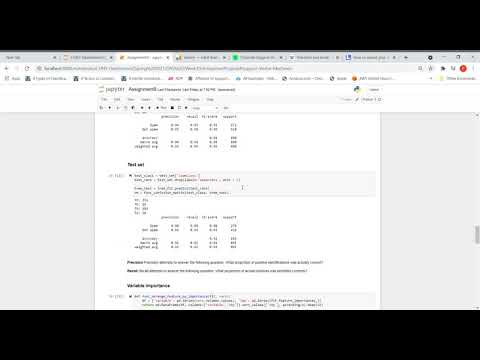

In [25]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Od-cg24qsLs')